# **Image Classification with Softmax Regression**

In this notebook, we study the problem of character recognition on the MNIST dataset ([Wiki](https://en.wikipedia.org/wiki/MNIST_database)). First, we perform an exploratory analysis to visualize the dataset, then we are going to compare naive bayes and softmax regression on it.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.datasets import mnist
from collections import Counter

## **Data Visualization**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28), Labels: (60000,)
Test set shape: (10000, 28, 28), Labels: (10000,)


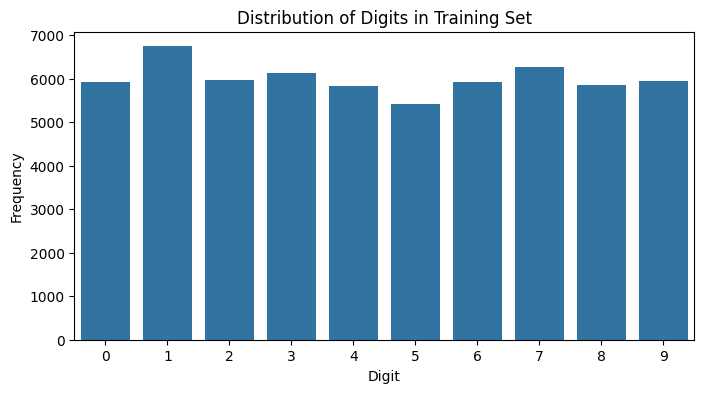

In [4]:
# Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Basic info
print(f"Training set shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels: {y_test.shape}")

# Label distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()



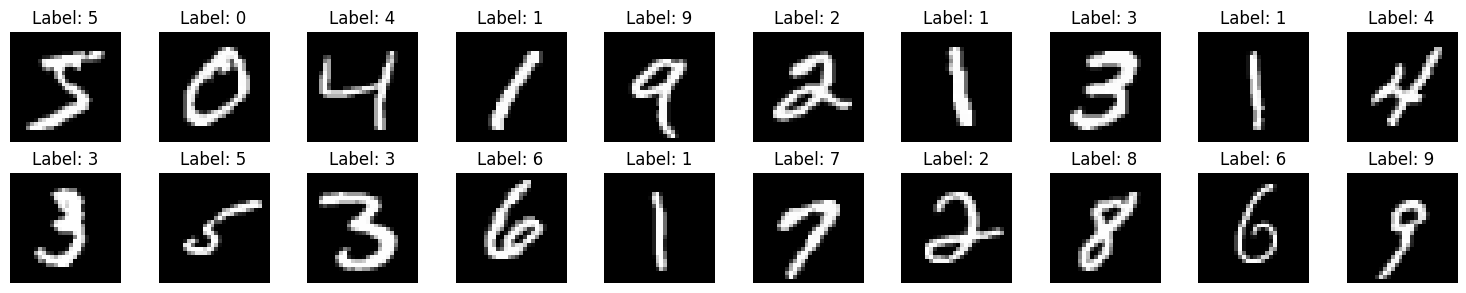

In [5]:
# Show some sample images
def show_samples(images, labels, n=20):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(X_train, y_train)

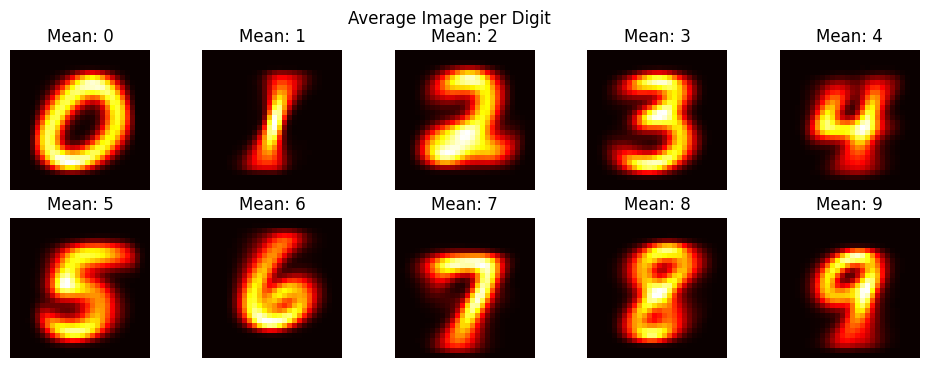

In [6]:
# Average digit visualization
mean_images = np.zeros((10, 28, 28))
for digit in range(10):
    digit_images = X_train[y_train == digit]
    mean_images[digit] = np.mean(digit_images, axis=0)

plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_images[i], cmap='hot')
    plt.title(f"Mean: {i}")
    plt.axis('off')
plt.suptitle("Average Image per Digit")
plt.show()

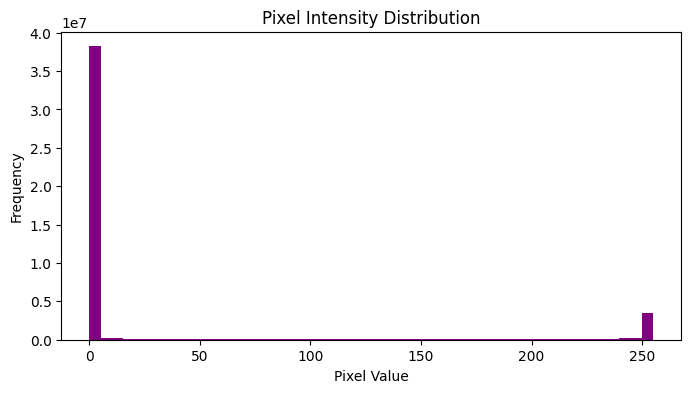

In [7]:
# Pixel intensity histogram
plt.figure(figsize=(8, 4))
plt.hist(X_train.flatten(), bins=50, color='purple')
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

## **Naive Bayes vs Softmax Regression**

Training Gaussian Naive Bayes...
Naive Bayes Accuracy: 0.5558


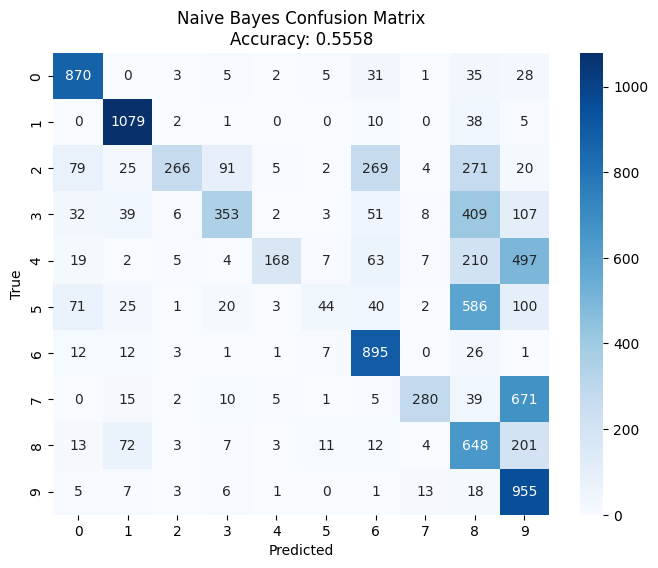

In [8]:
# Flatten the 28x28 images into 784-dimensional vectors
X_train_flat = X_train.reshape(-1, 28*28).astype('float32')
X_test_flat = X_test.reshape(-1, 28*28).astype('float32')

# Visualization: Confusion Matrices
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

# Naive Bayes (GaussianNB)
print("Training Gaussian Naive Bayes...")
gnb = GaussianNB()
gnb.fit(X_train_flat, y_train)
y_pred_nb = gnb.predict(X_test_flat)
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")

plot_confusion(y_test, y_pred_nb, f"Naive Bayes Confusion Matrix\nAccuracy: {acc_nb:.4f}")


Training Softmax Regression...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min finished


Softmax Regression Accuracy: 0.9216


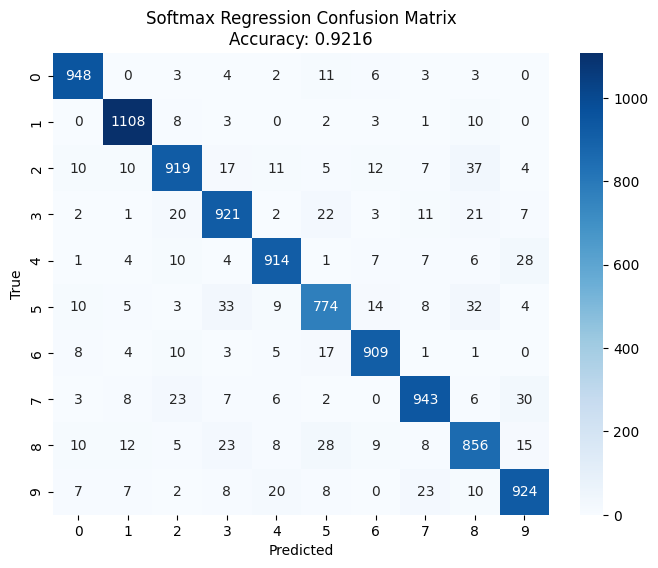

In [10]:
# Softmax Regression (Multinomial Logistic Regression)
print("Training Softmax Regression...")
# Standardization improves convergence for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

softmax = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    verbose=1
)
softmax.fit(X_train_scaled, y_train)
y_pred_lr = softmax.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Softmax Regression Accuracy: {acc_lr:.4f}")


plot_confusion(y_test, y_pred_lr, f"Softmax Regression Confusion Matrix\nAccuracy: {acc_lr:.4f}")
